## 朝阳医院2018年销售数据分析报告

#### 数据分析的基本过程分为：提出问题、理解数据、数据清洗、构建模型、数据可视化。

（1）提出问题：明确分析的目的；

（2）理解数据：主要从数据的采集、导入、查看数据的描述统计信息等方面对数据有基本了解；

（3）数据清洗：主要有6个步骤：选择子集、列名重命名、缺失数据处理、数据类型转换、数据排序、异常值处理；

（4）构建模型：

（5）数据可视化：

接下来我们以朝阳医院2018年的销售数据作为样本，进行简单的数据分析。

### 一、提出问题：

拿到这组数据，首先我们要明确分析的目的，我们是想知道以下数据：客户的月均消费次数；客户的月均消费金额；客单价；客户的消费趋势。


### 二、理解数据，对数据有大体认知

首先导入会用到的库。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

然后载入数据。首次读取excel文件，需要安装xlrd库。

在pandas中，常用的载入函数是read_csv、read_excel和read_table，table可以读取txt。若是服务器相关的部署，则还会用到read_sql，直接访问数据库，但它必须配合mysql相关包。

安装中文支持库，在后期图标绘制过程以支持中文。

In [2]:
%%bash
#安装中文字体
sudo yum install -y ghostscript-chinese-zh_CN
fc-list :lang=zh

Loaded plugins: dkms-build-requires, extras_suggestions, langpacks, priorities,
              : update-motd, versionlock
Package ghostscript-chinese-zh_CN-0.4.0-4.amzn2.noarch already installed and latest version
Nothing to do
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei Sharp,文泉驛點陣正黑,文泉驿点阵正黑:style=Regular
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei Mono,文泉驛等寬正黑,文泉驿等宽正黑:style=Regular
/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc: WenQuanYi Zen Hei,文泉驛正黑,文泉驿正黑:style=Regular


安装后查看可用的字体。

In [3]:
#查看可用字体

from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	C059
	D050000L
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	Inconsolata
	Nimbus Mono PS
	Nimbus Roman
	Nimbus Sans
	Nimbus Sans Narrow
	P052
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	Source Code Pro
	URW Bookman
	URW Gothic
	Ubuntu
	Ubuntu Condensed
	Ubuntu Mono
	WenQuanYi Zen Hei
	Z003
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10


修改字体为WenQuanYi Zen Hei。

In [4]:
#修改字体
plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [5]:
sales=pd.read_excel('./data-set.xlsx',dtype='object')

接下来查看数据概览。以下代码列出了数据的各个字段名，共6577行，7列，6577 non-null 说明各字段没有空值,"社保账号"和"购药时间"有1个空值,object说明类型均为object。

In [6]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   购药时间    6576 non-null   object
 1   社保卡号    6576 non-null   object
 2   商品编码    6577 non-null   object
 3   商品名称    6577 non-null   object
 4   销售数量    6577 non-null   object
 5   应收金额    6577 non-null   object
 6   实收金额    6577 non-null   object
dtypes: object(7)
memory usage: 359.9+ KB
None


若需要查看文件有多少行多少列，可用以下代码：

In [7]:
print(sales.shape)

(6578, 7)


查看文件的部分数据，用head函数显示头部数据，默认5行，可自由设置参数。如果是尾部数据，可用tail函数。

In [8]:
sales.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


### 三、数据清洗
（1）选择子集：

若数据量较大，且不是每行/列信息都有用，可针对性的选择子集进行分析。可用ix函数， 它通过DataFrame的索引和轴标签选择行或列的子集，代码形式为：

```subsales=sales.loc[:,:]```

因为数据本身不多，此处不再取子集。

（2）列名重命名

将'购药时间'改为’销售时间‘，利用inplace=True可直接在原数据框内改动

In [9]:
sales.rename(columns={'购药时间':'销售时间'},inplace=True)

再次显示文件信息，查看是否列名是否已经修改

In [10]:
sales.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,001616528,236701,强力VC银翘片,6,82.8,69
1,2018-01-02 星期六,001616528,236701,清热解毒口服液,1,28,24.64
2,2018-01-06 星期三,0012602828,236701,感康,2,16.8,15
3,2018-01-11 星期一,0010070343428,236701,三九感冒灵,1,28,28
4,2018-01-15 星期五,00101554328,236701,三九感冒灵,8,224,208


(3) 缺失数据处理：删除销售数据和社保卡号为空的行。

有两种办法：①删除缺失数据（dropna方法）；② 填充缺失数据（filina方法）。

此处使用dropna直接删除缺失数据。

dropna默认丢弃任何含有缺失值的行，即dropna()等价于dropna(axis=0,how='any')；

若要丢弃列，则axis=1;how 参数可选的值为 any 或者 all，若要丢弃全为NA的行/列，则how='all';

dropna还有一个参数-thresh，该参数的类型为整数，它的作用是，比如
thresh=3，会在一行中至少有 3 个非 NA
值时将其保留。dropna(axis=1,thresh=1),保留至少有1个非NA值的列。还可以通过dropna的参数subset移除指定列为空的数据。

此处代码为：

In [11]:
sales=sales.dropna(subset=['销售时间','社保卡号'],how='any')

(4) 数据类型处理：

因导入时均以‘object’类型导入，为便于计算，需要做类型转换。 

In [12]:
sales['销售数量']=sales['销售数量'].astype('float')
sales['应收金额']=sales['应收金额'].astype('float')
sales['实收金额']=sales['实收金额'].astype('float')
print('转换后的数据类型为：\n')
sales.dtypes

转换后的数据类型为：



销售时间     object
社保卡号     object
商品编码     object
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

销售时间列格式现在为‘2018-01-01 星期五’，需先把日期和星期切分，然后转换为时间类型。

In [13]:
st = sales['销售时间'].str.split(' ', n=1)
sales['销售时间'], sales['销售星期'] = st.str[0], st.str[1]
sales

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,销售星期
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.00,星期五
1,2018-01-02,001616528,236701,清热解毒口服液,1.0,28.0,24.64,星期六
2,2018-01-06,0012602828,236701,感康,2.0,16.8,15.00,星期三
3,2018-01-11,0010070343428,236701,三九感冒灵,1.0,28.0,28.00,星期一
4,2018-01-15,00101554328,236701,三九感冒灵,8.0,224.0,208.00,星期五
...,...,...,...,...,...,...,...,...
6572,2018-04-27,0010060482828,2367011,高特灵,1.0,5.6,5.00,星期三
6573,2018-04-27,00107886128,2367011,高特灵,10.0,56.0,54.80,星期三
6575,2018-04-27,0010087865628,2367011,高特灵,2.0,11.2,9.86,星期三
6576,2018-04-27,0013406628,2367011,高特灵,1.0,5.6,5.00,星期三


若需要查看文件有多少行多少列，可用以下代码：

切分好之后，把销售时间变为时间类型。以下代码中，erros='coerce'如果原始数据不符合日期的格式，转换后的值会变为NAT。format是原始数据的日期格式。

In [14]:
sales.loc[:,'销售时间']=pd.to_datetime(sales.loc[:,'销售时间'],format='%Y-%m-%d',errors='coerce')
sales.dtypes

销售时间    datetime64[ns]
社保卡号            object
商品编码            object
商品名称            object
销售数量           float64
应收金额           float64
实收金额           float64
销售星期            object
dtype: object

（5）排序

时间一列现在是无序排列的，需要排序一下，排序之后索引会被打乱，所以也需要重置一下索引。

如下为按照销售日期进行升序排列，代码中，对数据按照时间排序，by:按那几列排序；ascending=True 表示升序排列；ascending=False表示降序排列。

In [15]:
sales=sales.sort_values(by='销售时间',ascending=True) 
print('排序后的数据集为：\n')
sales.head()

排序后的数据集为：



,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,销售星期
0,2018-01-01,001616528,236701,强力VC银翘片,6.0,82.8,69.0,星期五
1475,2018-01-01,00107891628,861456,酒石酸美托洛尔片(倍他乐克),2.0,14.0,12.6,星期五
1306,2018-01-01,001616528,861417,雷米普利片(瑞素坦),1.0,28.5,28.5,星期五
3859,2018-01-01,0010073966328,866634,硝苯地平控释片(欣然),6.0,111.0,92.5,星期五
3888,2018-01-01,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0,星期五


排序之后再重置一下index。其中代码中drop=True会舍弃原有的index，drop默认等于’Fales‘，保留原索引，增加一列新的索引。 

6、异常值处理

排序后，查看每一列的描述统计信息

In [16]:
sales.describe()

,销售数量,应收金额,实收金额
count,6575.000000,6575.000000,6575.000000
mean,2.385095,50.478935,46.321582
std,2.373702,87.607883,80.987682
min,-10.000000,-374.000000,-374.000000
25%,1.000000,14.000000,12.320000
50%,2.000000,28.000000,26.600000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


销售数量不可能小于0。所以需去除小于0的值。

In [17]:
sales=sales.loc[sales.销售数量>0,:] 

然后打印结果看下是否还有异常值：

In [18]:
sales.describe()

,销售数量,应收金额,实收金额
count,6532.000000,6532.000000,6532.000000
mean,2.406154,50.956047,46.763345
std,2.363061,87.561159,80.926505
min,1.000000,1.200000,0.030000
25%,1.000000,14.000000,12.600000
50%,2.000000,28.000000,27.000000
75%,2.000000,59.600000,53.000000
max,50.000000,2950.000000,2650.000000


完成上述步骤，基本的数据清洗工作完成，接下来对数据进行分析。

### 四、构建模型
现在针对最开始提出的问题，运用不同的分析方法进行解决。

（1）月均消费次数：等于总消费次数 / 月份数

在此约定，总消费次数：同一天内，同一个人发生的所有消费算作一次消费。
根据列名（销售时间，社区卡号），如果这两个列值同时相同，只保留一条，将重复的数据删除。
总消费次数如下，即subsales有多少行信息：

In [19]:
subsales=sales.drop_duplicates(subset=['销售时间','社保卡号'])
total=subsales.shape[0]  
print(total)

5363


计算月份数

In [20]:
month=(subsales['销售时间'].max()-subsales['销售时间'].min()).days//30

计算月均消费次数

In [21]:
t1=total/month
print('月均消费次数为：','%.2f'%t1)

月均消费次数为： 893.83


（2） 月均消费金额：等于总消费金额/月份数。在计算总金额的时候不能去重，需要都计算上金额。

In [22]:
total1=sales['实收金额'].sum()
t2=total1/month
print('月均消费金额为：','%.2f'%t2)

月均消费金额为： 50909.69


（3） 客单价：等于总消费金额/总消费次数

In [23]:
t3=total1/total
print('客单价为：','%.2f'%t3)

客单价为： 56.96


（4）消费趋势

要了解消费趋势，我们先根据时间的不同，了解下消费金额的大体变化。

需要对去重后的数据按照天进行重新采样，首先要把索引变成时间：

In [24]:
sales.index = pd.DatetimeIndex(sales['销售时间'])

以下为按日采样：

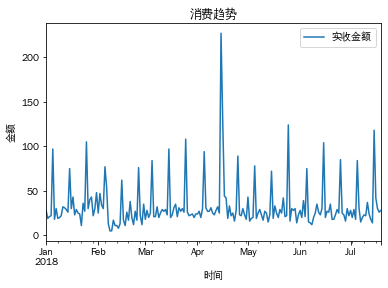

In [25]:
salesdays=sales.resample('D').count()   
salesdays.plot(use_index=True,y='实收金额')
plt.xlabel('时间')
plt.ylabel('金额')
plt.title('消费趋势')
plt.show()

这样我们对每天的消费数据有一个大体的掌握，然后按月采样看下每个月的总销售额是否有很大的差异。

以下为按月采样：

In [26]:
salesm = sales.resample('M').sum()   
#sum()会为取样的数值数据按月进行求和，打印出来如下：
salesm.head()

,销售数量,应收金额,实收金额
销售时间,,,
2018-01-31,2527.0,53561.6,49461.19
2018-02-28,1858.0,42028.8,38790.38
2018-03-31,2225.0,45318.0,41597.51
2018-04-30,3010.0,54324.3,48812.70
2018-05-31,2225.0,51263.4,46925.27


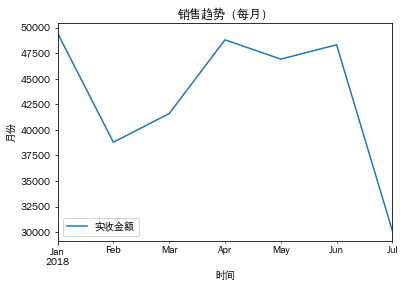

In [27]:
salesm.plot(use_index=True, y = '实收金额')
plt.xlabel('时间')
plt.ylabel('月份')
plt.title('销售趋势（每月）')
plt.show()

了解下月均的客流量

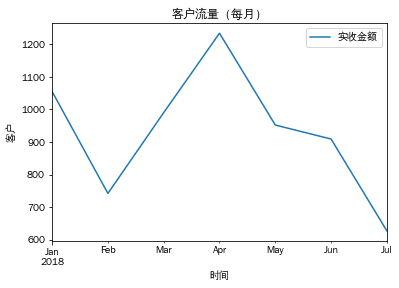

In [28]:
salesm = sales.resample('M').count()
salesm.plot(use_index=True, y = '实收金额')
plt.xlabel('时间')
plt.ylabel('客户')
plt.title('客户流量（每月）')
plt.show() 

这时候可以看出，医院的销售总额和客流量基本成正比。但六月数据较异常，可能该月份人均客单价提升所致。具体问题还需在具体分析。以上仅提供分析思路参考。